<a href="https://colab.research.google.com/github/DiegoPincheiraIb/Experiencias_EL5206/blob/master/Experiencia_2/Experiencia_2_EL5206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuraciones Preliminares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import os

## Cargar datos a colab:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ojos_gal.rar to ojos_gal.rar
Saving ojos_impostor.rar to ojos_impostor.rar
Saving ojos_test.rar to ojos_test.rar


In [3]:
!unrar x ojos_gal.rar
!unrar x ojos_impostor.rar
!unrar x ojos_test.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ojos_gal.rar

Creating    ojos_gal                                                  OK
Extracting  ojos_gal/I10_gal.jpg                                           9%  OK 
Extracting  ojos_gal/I1_gal.jpg                                           19%  OK 
Extracting  ojos_gal/I2_gal.jpg                                           31%  OK 
Extracting  ojos_gal/I3_gal.jpg                                           42%  OK 
Extracting  ojos_gal/I4_gal.jpg                                           50%  OK 
Extracting  ojos_gal/I5_gal.jpg                                           60%  OK 
Extracting  ojos_gal/I6_gal.jpg                                           71%  OK 
Extracting  ojos_gal/I7_gal.jpg                                           79%  OK 
Extracting  ojos_gal/I8_gal.jpg                                           90%  OK 


In [4]:
!ls

ojos_gal      ojos_impostor	 ojos_test	sample_data
ojos_gal.rar  ojos_impostor.rar  ojos_test.rar


In [5]:
Str_Gal = 'ojos_gal/'
Str_Impostor = 'ojos_impostor/ojos_impostor/'
Str_Test = 'ojos_test/'
Listado_Gal = os.listdir(Str_Gal)
Listado_Impostor = os.listdir(Str_Impostor)
Listado_Test = os.listdir(Str_Test)

## Función para convertir a escala de grises:

In [6]:
Listado_Gal_Gris = []
for imagen in Listado_Gal:
  Listado_Gal_Gris.append(color.rgb2gray(io.imread(Str_Gal + imagen)))

Listado_Impostor_Gris = []
for imagen in Listado_Impostor:
  Listado_Impostor_Gris.append(color.rgb2gray(io.imread(Str_Impostor + imagen)))

Listado_Test_Gris = []
for imagen in Listado_Test:
  Listado_Test_Gris.append(color.rgb2gray(io.imread(Str_Test + imagen)))

# Algoritmo LBP

In [7]:
def LBP(ImagenGris_Matriz):
  Matriz_Final_Copia = np.copy(ImagenGris_Matriz)
  Mascara_Valores = np.array([[128., 64., 32.],
                  [1., 0., 1.],
                  [2., 4., 8.]])
  for row in range(1,len(ImagenGris_Matriz)-1):
    for column in range(1,len(ImagenGris_Matriz[0])-1):
      mask = np.zeros((3,3))
      mask[1,1] = ImagenGris_Matriz[row,column]
      for fila in range(-1,2):
        for columna in range(-1,2):
          if fila != 0 and columna !=0:                      
            if ImagenGris_Matriz[row+fila,column+columna] > mask[1,1]:
              mask[fila, columna] = 1
            else:
              mask[fila, columna] = 0
      Numero_Entero = np.sum(mask * Mascara_Valores)
      Matriz_Final_Copia[row, column] = Numero_Entero

  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, -1, 0) # Elimina la última fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, -1, 1) # Elimina la última columna
  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, 0, 0) # Elimina la primera fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, 0, 1) # Elimina la primera columna
  return Matriz_Final_Copia
  
def Imagen_Plot(Matriz_Obj):
  plt.imshow(Matriz_Obj, cmap='gray')
  plt.show()

# Extracción de vectores de características:

## Extraer_Caract()
Dado una imagen de 500x600, devuelve un vector con histogramas resultantes de divivdir la imagen en 30 regiones

In [37]:
def Extraer_Caract(Imagen, Normalizar=False):
  Hist_Arr = np.zeros((0,))
  for row in range(0, Imagen.shape[0], 100): 
    for col in range(0, Imagen.shape[1], 100):
      hist, bin_edges = np.histogram(Imagen[row:row+100, col:col+100], bins=59, density=Normalizar)
      Hist_Arr = np.concatenate((Hist_Arr, hist))
  return Hist_Arr


Prueba:

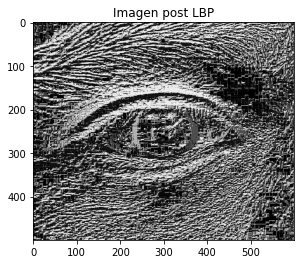

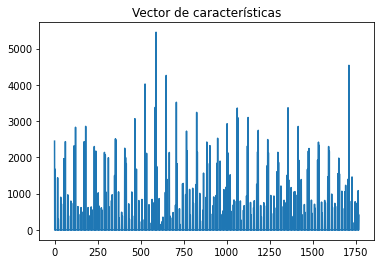

In [40]:
Prueba = Listado_Gal_Gris[7]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
Vector_Caract_Prueba = hist_arr = Extraer_Caract(Matriz_LBP)
plt.plot(Vector_Caract_Prueba)
plt.title('Vector de características')
plt.show()

## Estirador_Imagen():
Dado una imagen objetivo, un paso y un ancho de ventana, "estira" una imagen.

In [8]:
def Estirador_Imagen(Imagen_Obj, Stride_Obj, Width_Obj):
  Matriz_Final = np.zeros((Stride_Obj,0))
  for row in range(0,len(Imagen_Obj),Stride_Obj): # Índices: 0, 100, 200, 300, 400
    for column in range(0, len(Imagen_Obj[0]),Stride_Obj): # Índices: 0, 100, 200, 300, 400, 500
      Mask = Imagen_Obj[row:row + Width_Obj,column:column + Width_Obj]
      Matriz_Final = np.concatenate((Matriz_Final,Mask),axis = 1)
  return Matriz_Final

## Calculador_Vector_Caract():
Dado una matriz y un paso, calcula histogramas tomando toda la imagen hacia abajo y moviendose en pasos regulares hacia la derecha, guardando los resultados de cada iteración en un arreglo.

In [13]:
def Calculador_Vector_Caract(Matriz_Obj,Stride_Obj):
  Vector_Caract_Obj = np.zeros((0,))
  for i in range(0,len(Matriz_Obj[0]),Stride_Obj):
    (Histogramas_Prueba, Bins_Prueba) = np.histogram(Estirador_Prueba[0:100,i], bins=59)
    Vector_Caract = np.concatenate((Vector_Caract_Obj,Histogramas_Prueba))
  return Vector_Caract_Obj

Prueba:

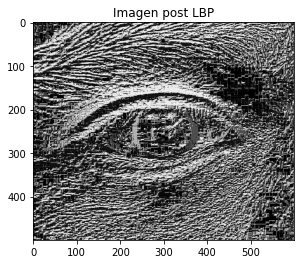

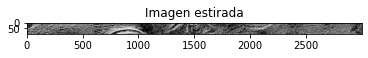

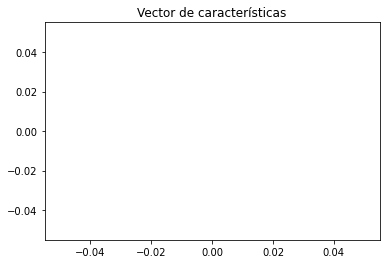

In [14]:
Prueba = Listado_Gal_Gris[7]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
Stride = 100
Width = 100
Estirador_Prueba = Estirador_Imagen(Matriz_LBP, Stride, Width)
plt.title('Imagen estirada')
Imagen_Plot(Estirador_Prueba)
Vector_Caract_Prueba = Calculador_Vector_Caract(Estirador_Prueba, Stride)
plt.plot(Vector_Caract_Prueba)
plt.title('Vector de características')
plt.show()

In [38]:
hist_arr = Extraer_Caract(Matriz_LBP)